
Auteur:

Mohamed Aymen BOUYAHIA


#RBM

In [1]:
import numpy as np
from scipy.io.matlab import mio
import matplotlib.pyplot as plt
import random

In [2]:
class RBM():
    def __init__(self, input_size, output_size):
        self.W = None
        self.b = None
        self.a = None
        self.p = input_size
        self.q = output_size

    def init_RBM(self):
        self.a = np.zeros((1,self.p))
        self.b = np.zeros((1,self.q))
        self.W = np.sqrt(0.01)*np.random.randn(self.p, self.q)


    def entree_sortie_RBM(self,V):
        return 1/(1 + np.exp(-(V@self.W + self.b)))

    def sortie_entree_RBM(self,H):
        return 1/(1 + np.exp(-(H@self.W.T + self.a)))

    def train_RBM(self, X, nb_iter=1000, lr=1e-1,  batch_size=10):

        for epoch in range(nb_iter):
            np.random.shuffle(X)

            for batch in range(0, np.size(X,axis=0), batch_size):

                X_batch = X[batch : min(batch + batch_size, np.size(X,axis=0)), :]
                t_b = np.size(X_batch,axis=0)
                v_0 = X_batch
                p_h_v_0 = self.entree_sortie_RBM(v_0)
                h_0 = (np.random.rand(t_b, self.q) < p_h_v_0) * 1
                p_v_h_0 = self.sortie_entree_RBM(h_0)
                v_1 = (np.random.rand(t_b,self.p) < p_v_h_0) * 1
                p_h_v_1 = self.entree_sortie_RBM(v_1)

                L = np.sum(np.power(v_0-v_1,2))/batch_size #Compute the Loss

                grad_a = np.sum(v_0-v_1, axis=0)
                grad_b = np.sum(p_h_v_0-p_h_v_1, axis=0)
                grad_W = v_0.T@p_h_v_0 - v_1.T@p_h_v_1

                self.W += (lr/t_b) * grad_W
                self.a += (lr/t_b) * grad_a
                self.b += (lr/t_b) * grad_b

            if epoch%10==0:
                print("  Loss : %f  |  epoch %d/%d" %(L, epoch+1,nb_iter))


    def generer_image_RBM(rbm, iter_gibbs, nb_img):
        d=np.zeros((width,1))
        space=np.zeros((width,1))

        for i in range(nb_img):
            plt.figure()
            v = (np.random.rand(rbm.p) < 0.5)*1

            for j in range(iter_gibbs):
                h = (np.random.rand(rbm.q) < rbm.entree_sortie_RBM(v)) * 1
                v = (np.random.rand(rbm.p) < rbm.sortie_entree_RBM(h)) * 1

            v=v.reshape(width,height)
            d=np.concatenate((d,v),axis=1)
            d=np.concatenate((d,space),axis=1)

        plt.imshow(d)

    def lire_alpha_digits(caracteres):
        matrice = []
        for caractere in caracteres:
            for example in fichier['dat'][caractere]:
                matrice.append(example.reshape(width*height))
        return np.array(matrice)

<ipython-input-3-ab907b23cb6b>:2: DeprecationWarning: Please use `loadmat` from the `scipy.io.matlab` namespace, the `scipy.io.matlab.mio` namespace is deprecated.
  fichier = mio.loadmat("./binaryalphadigs")


  Loss : 87.800000  |  epoch 1/1000
  Loss : 51.800000  |  epoch 11/1000
  Loss : 28.000000  |  epoch 21/1000
  Loss : 26.900000  |  epoch 31/1000
  Loss : 20.900000  |  epoch 41/1000
  Loss : 19.800000  |  epoch 51/1000
  Loss : 13.700000  |  epoch 61/1000
  Loss : 13.700000  |  epoch 71/1000
  Loss : 11.700000  |  epoch 81/1000
  Loss : 9.200000  |  epoch 91/1000
  Loss : 6.200000  |  epoch 101/1000
  Loss : 6.600000  |  epoch 111/1000
  Loss : 9.400000  |  epoch 121/1000
  Loss : 6.300000  |  epoch 131/1000
  Loss : 5.000000  |  epoch 141/1000
  Loss : 4.600000  |  epoch 151/1000
  Loss : 3.800000  |  epoch 161/1000
  Loss : 4.600000  |  epoch 171/1000
  Loss : 4.000000  |  epoch 181/1000
  Loss : 1.900000  |  epoch 191/1000
  Loss : 4.800000  |  epoch 201/1000
  Loss : 4.500000  |  epoch 211/1000
  Loss : 3.400000  |  epoch 221/1000
  Loss : 2.600000  |  epoch 231/1000
  Loss : 1.200000  |  epoch 241/1000
  Loss : 4.800000  |  epoch 251/1000
  Loss : 2.800000  |  epoch 261/1000
  L

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

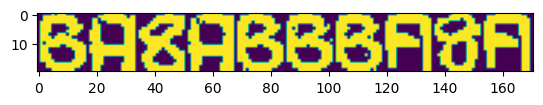

In [3]:
width, height = 20, 16
fichier = mio.loadmat("./binaryalphadigs")
data=RBM.lire_alpha_digits([8, 9, 10])


model = RBM(320,200) # RBM of size 320 = 20*16
model.init_RBM()
model.train_RBM(data)

RBM.generer_image_RBM(model, 1000, 10)
